# **Import Libary**

ติดตั้ง pandas-profiling libary

In [114]:
# pip install 'pandas-profiling[notebook]'
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [115]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# **อ่านและสำรวจข้อมูล**

อ่านข้อมูล

In [116]:
df = pd.read_csv('/content/winemag-data_first150k.csv', sep = ';', encoding = 'latin1')

สำรวจข้อมูล

In [117]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Missing values**

หา Missing value (จำนวนค่าที่หายไปในแต่ละคอลัมน์)

In [118]:
df.isnull().sum()

country                 2
designation         43826
points                  5
price               13396
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64

ดูข้อมูล 5 แถวแรก

In [119]:
df.head()

country                            designation  points  price  \
0      US                      Martha's Vineyard    96.0  235.0   
1   Spain  Carodorum SelecciÃ³n Especial Reserva    96.0  110.0   
2      US          Special Selected Late Harvest    96.0   90.0   
3      US                                Reserve    96.0   65.0   
4  France                            La BrÃ»lade    95.0   66.0   

         province           region_1           region_2             variety  \
0      California        Napa Valley               Napa  Cabernet Sauvignon   
1  Northern Spain               Toro                NaN       Tinta de Toro   
2      California     Knights Valley             Sonoma     Sauvignon Blanc   
3          Oregon  Willamette Valley  Willamette Valley          Pinot Noir   
4        Provence             Bandol                NaN  Provence red blend   

                     winery  last_year_points  
0                     Heitz                94  
1  Bodega Carmen RodrÃ­guez                92  
2                  Macauley               100  
3                     Ponzi                94  
4     Domaine de la BÃ©gude                94

# **Feature Engineering**

# **เทคนิค Imputation**

แทน Mission Value ด้วย ค่าเฉลี่ย

In [120]:
new_df = df.copy()
new_df['price'].fillna(df['price'].mean(), inplace = True)

<ipython-input-120-84a0b9cf1b93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['price'].fillna(df['price'].mean(), inplace = True)


In [121]:
new_df.isnull().sum()

country                 2
designation         43826
points                  5
price                   0
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64

หา Missing value (สัดส่วนของค่าที่หายไปในแต่ละคอลัมน์)

In [122]:
df.isnull().mean()

country             0.000014
designation         0.304269
points              0.000035
price               0.093004
province            0.000049
region_1            0.165548
region_2            0.594701
variety             0.000035
winery              0.000035
last_year_points    0.000000
dtype: float64

ลบ columns ที่มี Missing Value มากกว่า 50% (region_2)

In [123]:
threshold = 0.5
new_df = df[df.columns[df.isnull().mean() < threshold]]

In [124]:
new_df.isnull().mean()

country             0.000014
designation         0.304269
points              0.000035
price               0.093004
province            0.000049
region_1            0.165548
variety             0.000035
winery              0.000035
last_year_points    0.000000
dtype: float64

ดูจำนวนแถวที่หายไปหลังจากลบคอลัมท์ที่มี Mission Value เกิน 50%

In [125]:
print(df.shape)

new_df = df.loc[df.isnull().mean(axis = 1) < threshold]

new_df.shape

(144037, 10)


(144032, 10)

In [126]:
new_df.isnull().sum()

country                 2
designation         43821
points                  0
price               13391
province                2
region_1            23840
region_2            85654
variety                 0
winery                  0
last_year_points        0
dtype: int64

ถ้าค่า Outlier value ส่งผลกระทบต่อค่าเฉลี่ย ให้แทน Missing Value ด้วยค่ามัธยฐาน(median)แทนค่าเฉลี่ย(mean)


Note: Outlier value หรือ ค่าผิดปกติ คือ ค่าข้อมูลที่ แตกต่างอย่างมาก จากค่าข้อมูลอื่นๆ ในชุดข้อมูลเดียวกัน ค่าผิดปกติอาจเป็นค่าที่ สูงหรือต่ำกว่าค่าอื่นๆ อย่างมีนัยสำคัญ และอาจ ส่งผลกระทบต่อการวิเคราะห์ข้อมูล ได้

แทน Mission Value ด้วย ค่ามัธยฐาน

In [127]:
# print(df.median())
# new_df = df.fillna(df.median())
print(df.select_dtypes(include=np.number).median())
new_df = df.fillna(df.select_dtypes(include=np.number).median())

points              88.0
price               24.0
last_year_points    90.0
dtype: float64


In [128]:
new_df.isnull().sum()

country                 2
designation         43826
points                  0
price                   0
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64

แทน Mission Value ด้วย ค่า 0 (การแทน Mission Value ด้วย 0 จะทำให้ colum ที่มีค่าเป็น String มีค่าเป็น 0 ไปด้วย ซึ่งไม่ควร)

In [129]:
new_df = df.fillna(0)

In [130]:
new_df.isnull().sum()

country             0
designation         0
points              0
price               0
province            0
region_1            0
region_2            0
variety             0
winery              0
last_year_points    0
dtype: int64

In [131]:
new_df.head()

country                            designation  points  price  \
0      US                      Martha's Vineyard    96.0  235.0   
1   Spain  Carodorum SelecciÃ³n Especial Reserva    96.0  110.0   
2      US          Special Selected Late Harvest    96.0   90.0   
3      US                                Reserve    96.0   65.0   
4  France                            La BrÃ»lade    95.0   66.0   

         province           region_1           region_2             variety  \
0      California        Napa Valley               Napa  Cabernet Sauvignon   
1  Northern Spain               Toro                  0       Tinta de Toro   
2      California     Knights Valley             Sonoma     Sauvignon Blanc   
3          Oregon  Willamette Valley  Willamette Valley          Pinot Noir   
4        Provence             Bandol                  0  Provence red blend   

                     winery  last_year_points  
0                     Heitz                94  
1  Bodega Carmen RodrÃ­guez                92  
2                  Macauley               100  
3                     Ponzi                94  
4     Domaine de la BÃ©gude                94

และอีกวิธีคือลบแถวที่มี Missing Value (ควรใช้วิธีนี้ถ้าหลังจากลบแถวแล้วข้อมูลหายไปไม่มาก)

In [132]:
print(df.shape)
new_df = df.dropna(how = 'any')
print(new_df.shape)

(144037, 10)
(37576, 10)


# **เทคนิค Handling Outliers**

Note: Outlier value หรือ ค่าผิดปกติ คือ ค่าข้อมูลที่ แตกต่างอย่างมาก จากค่าข้อมูลอื่นๆ ในชุดข้อมูลเดียวกัน ค่าผิดปกติอาจเป็นค่าที่ สูงหรือต่ำกว่าค่าอื่นๆ อย่างมีนัยสำคัญ และอาจ ส่งผลกระทบต่อการวิเคราะห์ข้อมูล ได้

Data Virtualization เพื่อดูการกระจายข้อมูล

In [133]:
import seaborn as sns
from matplotlib import pyplot as plt

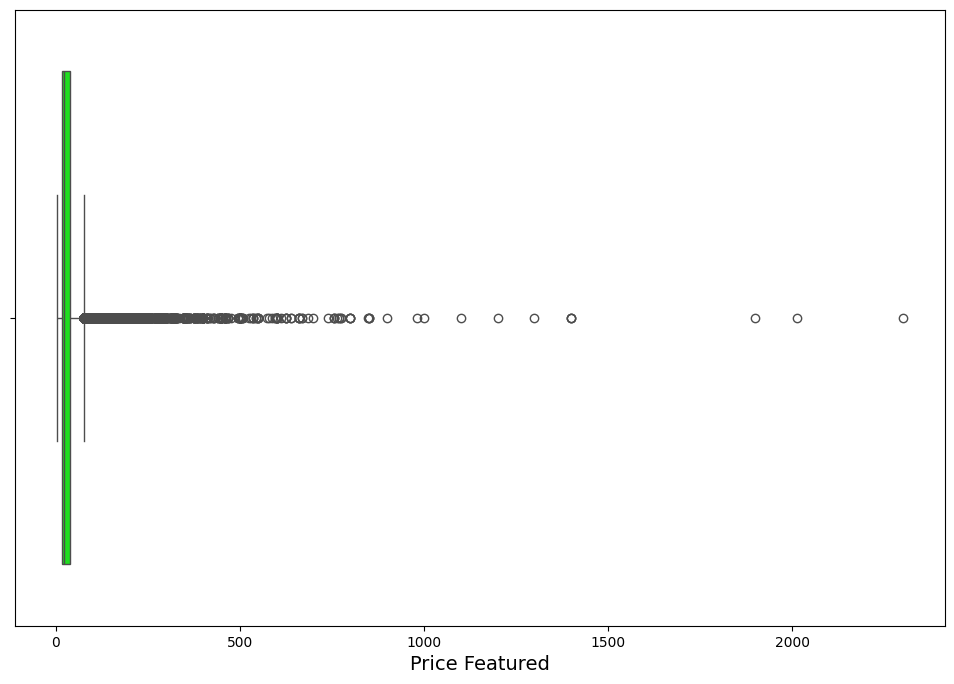

In [134]:
fig = plt.figure(figsize = (12, 8))
sns.boxplot(x=df['price'], color = 'lime')
plt.xlabel('Price Featured', fontsize=14)
plt.savefig('boxplot.png', dpi=300)

In [135]:
df['price'].describe()

count    130641.000000
mean         33.123399
std          36.368177
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

Drop outlier ด้วย Standard deviation

ลบแถวที่พบ outlier ใน column

In [136]:
print(df.shape)

factor = 3
upper_lim = df['price'].mean() + df['price'].std() * factor
lower_lim = df['price'].mean() - df['price'].std() * factor

drop_outlier1 = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

print(drop_outlier1.shape)

(144037, 10)
(129047, 10)


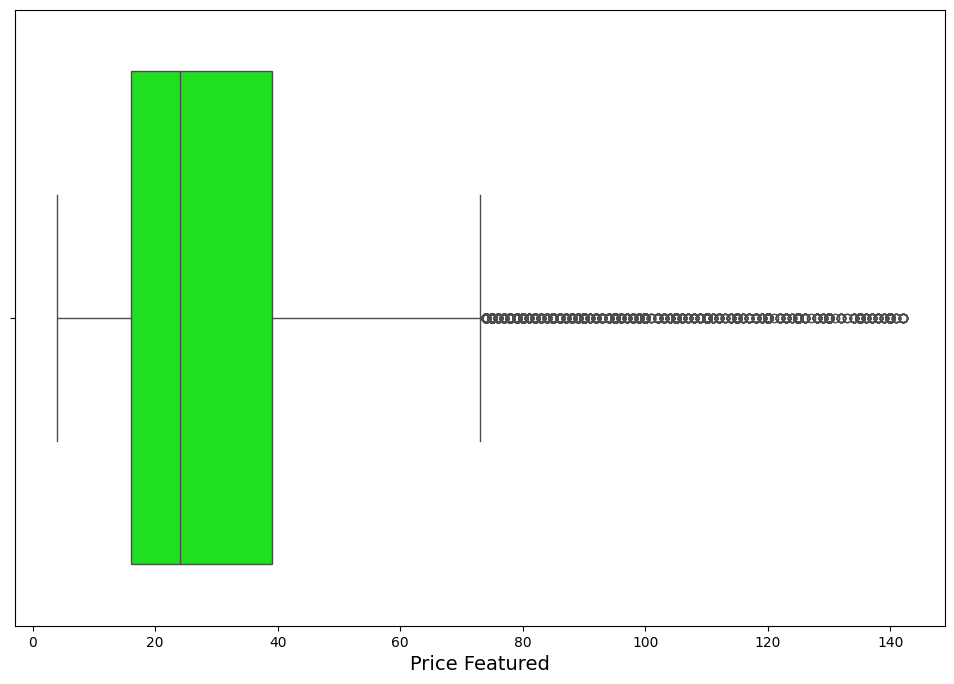

In [137]:
fig = plt.figure(figsize = (12, 8))
sns.boxplot(x=drop_outlier1['price'], color = 'lime')
plt.xlabel('Price Featured', fontsize=14)
plt.savefig('boxplot.png', dpi=300)

In [138]:
drop_outlier1['price'].describe()

count    129047.000000
mean         30.477283
std          21.342490
min           4.000000
25%          16.000000
50%          24.000000
75%          39.000000
max         142.000000
Name: price, dtype: float64

อธิบายการตัดขอบบนและล่าง (ตัวอย่าง)

In [139]:
a= [1,2,3,4,5,6,7,8,9,10]
test_df = pd.DataFrame(a, columns=['A'])
test_df

A
0   1
1   2
2   3
3   4
4   5
5   6
6   7
7   8
8   9
9  10

In [140]:
test_df['A']<8

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
Name: A, dtype: bool

In [141]:
test_df['A']>5

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: A, dtype: bool

In [142]:
(test_df['A']<8) & (test_df['A']>5)

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
Name: A, dtype: bool

In [143]:
test_df[(test_df['A']<8) & (test_df['A']>5)]

A
5  6
6  7

Drop outlier ด้วย Percentile

In [144]:
print(df.shape)

upper_lim = df['price'].quantile(.95)
lower_lim = df['price'].quantile(.05)

drop_outlier2 = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

drop_outlier2.shape

(144037, 10)


(113852, 10)

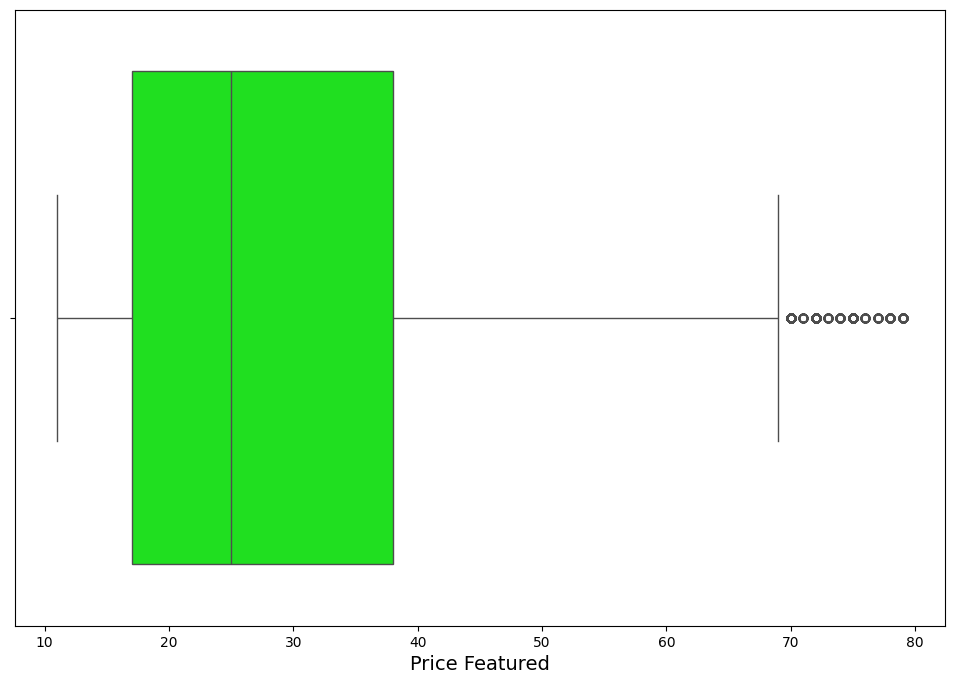

In [145]:
fig = plt.figure(figsize = (12, 8))
sns.boxplot(x=drop_outlier2['price'], color = 'lime')
plt.xlabel('Price Featured', fontsize=14)
plt.savefig('boxplot.png', dpi=300)

In [146]:
drop_outlier2['price'].describe()

count    113852.000000
mean         29.101781
std          15.492622
min          11.000000
25%          17.000000
50%          25.000000
75%          38.000000
max          79.000000
Name: price, dtype: float64

# **เทคนิค Binning**

เทคนิคการแบ่งข้อมูลเป็นช่วงๆ เช่น แบ่งราคาเป็น ต่ำ กลาง สูง

In [147]:
labels = ['low', 'medium', 'high']
bins = [0.,20.,40.,100.]

drop_outlier2['price_cat'] = pd.cut(drop_outlier2['price'], labels=labels, bins = bins, include_lowest=False)

drop_outlier2.sample(n=5).head()

<ipython-input-147-4b8b7101e897>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['price_cat'] = pd.cut(drop_outlier2['price'], labels=labels, bins = bins, include_lowest=False)


country                     designation  points  price    province  \
115405       US           La Encantada Vineyard    92.0   47.0  California   
97875        US        Amante Special Selection    83.0   25.0  California   
644     Germany  Graacher Himmelreich SpÃ¤tlese    90.0   30.0       Mosel   
83882    France          Domaine Moulin Ã  Vent    91.0   14.0  Beaujolais   
35870    France                 Vieilles Vignes    88.0   28.0    Burgundy   

               region_1       region_2     variety                     winery  \
115405  Sta. Rita Hills  Central Coast  Pinot Noir                 Waits-Mast   
97875          Temecula    South Coast   Red Blend                    Falkner   
644                 NaN            NaN    Riesling  Dr. Heidemanns-Bergweiler   
83882    Moulin-Ã -Vent            NaN       Gamay            Georges Duboeuf   
35870   Pouilly-FuissÃ©            NaN  Chardonnay             Domaine Luquet   

        last_year_points price_cat  
115405                98      high  
97875                 92    medium  
644                   86    medium  
83882                 90       low  
35870                 84    medium

# **เทคนิค Log Transform**

ใช้ log ในการแปลงข้อมูล ช่วยลดการเบ้ของข้อมูล

In [148]:
drop_outlier2['log'] = (drop_outlier2['price']).transform(np.log)
drop_outlier2.sample(n=5).head()

<ipython-input-148-d88d18ea217c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['log'] = (drop_outlier2['price']).transform(np.log)


country                                        designation  points  \
11255        US  Hallberg Vineyard Dijon Clone 777 7% Whole Clu...    93.0   
27283    France                                    Vieilles Vignes    87.0   
24089  Portugal                         Quinta da BacalhÃ´a Branco    90.0   
16136   Austria                                      Hochterrassen    87.0   
19950        US                               Spring Hill Vineyard    85.0   

       price                province              region_1 region_2  \
11255   65.0              California  Russian River Valley   Sonoma   
27283   25.0                Burgundy             Bourgogne      NaN   
24089   24.0  PenÃ­nsula de SetÃºbal                   NaN      NaN   
16136   18.0                Kremstal                   NaN      NaN   
19950   33.0              California          Sonoma Coast   Sonoma   

                 variety                       winery  last_year_points  \
11255         Pinot Noir                 Gary Farrell                96   
27283         Pinot Noir         ChÃ¢teau de Santenay                99   
24089   Portuguese White  BacalhÃ´a Wines of Portugal                94   
16136  GrÃ¼ner Veltliner               Salomon-Undhof                94   
19950         Pinot Noir                      Waxwing                81   

      price_cat       log  
11255      high  4.174387  
27283    medium  3.218876  
24089    medium  3.178054  
16136       low  2.890372  
19950    medium  3.496508

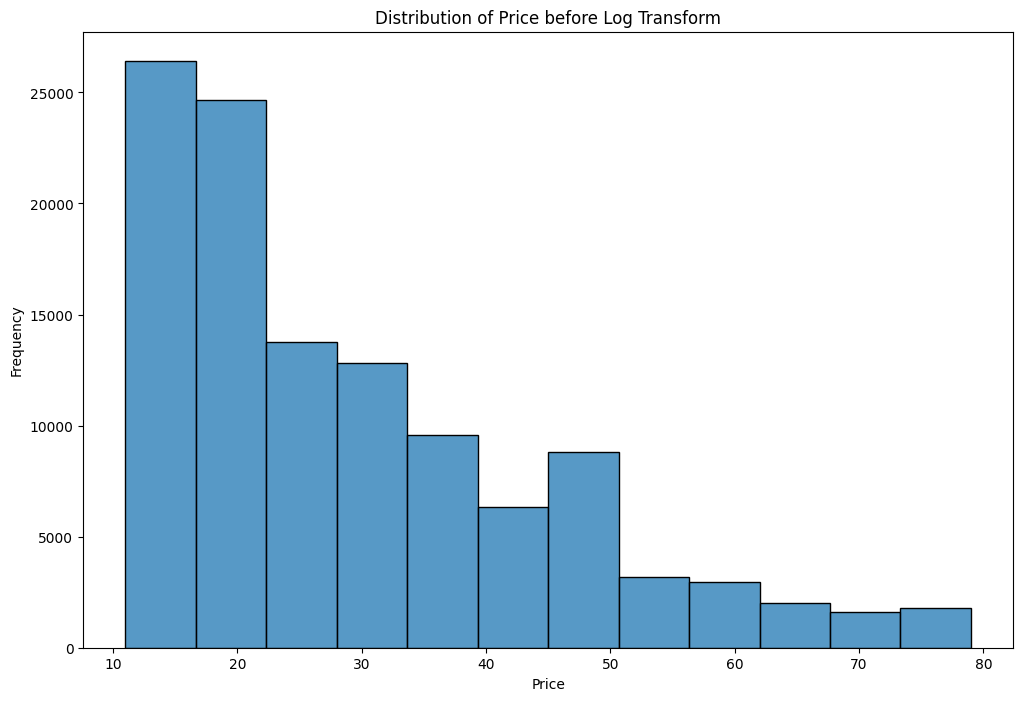

In [149]:
plt.figure(figsize=(12, 8))  # กำหนดขนาดของกราฟ
sns.histplot(drop_outlier2['price'], bins=12, kde=False)  # สร้าง histogram
plt.title('Distribution of Price before Log Transform')  # ตั้งชื่อกราฟ
plt.xlabel('Price')  # ตั้งชื่อแกน x
plt.ylabel('Frequency')  # ตั้งชื่อแกน y
plt.show()  # แสดงกราฟ

<ipython-input-150-46d5f721cb60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['log'] = drop_outlier2['price'].transform(np.log)


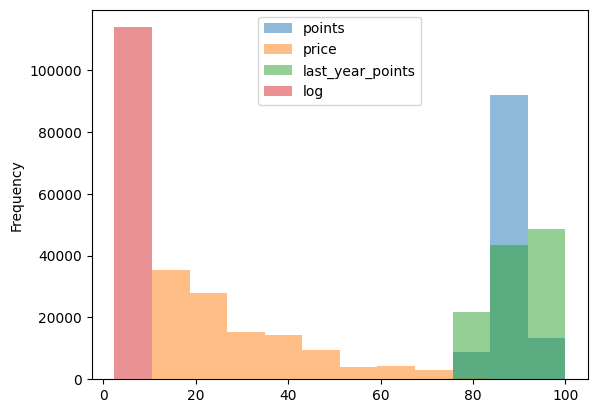

In [150]:
drop_outlier2['log'] = drop_outlier2['price'].transform(np.log)
ax = drop_outlier2.plot.hist(bins = 12, alpha = 0.5)

ax.figure.savefig('hist.png', dpi=300)

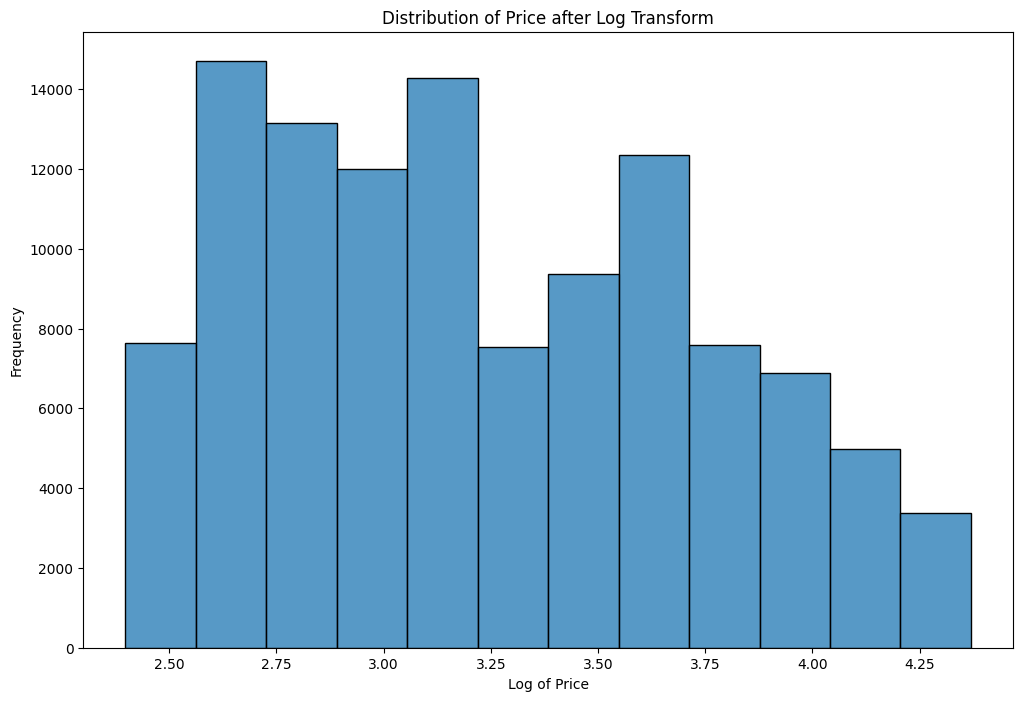

In [151]:
plt.figure(figsize=(12, 8))
sns.histplot(drop_outlier2['log'], bins=12, kde=False)
plt.title('Distribution of Price after Log Transform')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.show()

In [152]:
drop_outlier2.sample(n=5).head()

country                designation  points  price        province  \
60239    Italy  CuvÃ©e Vino Spumante Brut    85.0   18.0     Italy Other   
16457       US                     Estate    90.0   65.0      California   
15912       US                        NaN    90.0   35.0      California   
107773   Spain                        NaN    81.0   11.0  Northern Spain   
90530    Italy                        NaN    87.0   25.0          Veneto   

                                       region_1       region_2  \
60239                                     Italy            NaN   
16457                      Santa Cruz Mountains  Central Coast   
15912                                  Carneros    Napa-Sonoma   
107773                                    Rioja            NaN   
90530   Valpolicella Classico Superiore Ripasso            NaN   

                              variety                       winery  \
60239                 Sparkling Blend                   Foss Marai   
16457                      Pinot Noir  Regale Winery and Vineyards   
15912                           Syrah           Broadway Vineyards   
107773                    Tempranillo                     Flourish   
90530   Corvina, Rondinella, Molinara                      Arduini   

        last_year_points price_cat       log  
60239                 84       low  2.890372  
16457                 85      high  4.174387  
15912                 95    medium  3.555348  
107773                84       low  2.397895  
90530                 91    medium  3.218876

# **เทคนิค One-Hot Encoding**

In [153]:
encoded_columns = pd.get_dummies(drop_outlier2['price_cat'])
drop_outlier2 = drop_outlier2.join(encoded_columns)

drop_outlier2.sample(n=5).head()

country            designation  points  price          province  \
137833     Italy                Ceppate    92.0   37.0           Tuscany   
95174      Chile                   Lien    89.0   20.0  Colchagua Valley   
78870      Spain         Clisos Reserva    89.0   19.0    Northern Spain   
105035        US                Unoaked    90.0   16.0        California   
77967   Portugal  Monte Cascas Colheita    88.0   17.0             Douro   

        region_1       region_2         variety              winery  \
137833   Toscana            NaN  Cabernet Blend         Terrabianca   
95174        NaN            NaN       Red Blend              Maquis   
78870      Rioja            NaN     Tempranillo  Federico Paternina   
105035  Monterey  Central Coast      Chardonnay           Joel Gott   
77967        NaN            NaN  Portuguese Red         Casca Wines   

        last_year_points price_cat       log    low  medium   high  
137833                92    medium  3.610918  False    True  False  
95174                 84       low  2.995732   True   False  False  
78870                 85       low  2.944439   True   False  False  
105035                93       low  2.772589   True   False  False  
77967                 80       low  2.833213   True   False  False